In [1]:
import sys, os
from pathlib import Path
sys.path.append(str(Path(os.path.dirname(os.path.abspath("__file__"))).parent))

In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

from model.loss import create_loss

### ハイパーパラメータgammaの比較

Text(0, 0.5, 'loss')

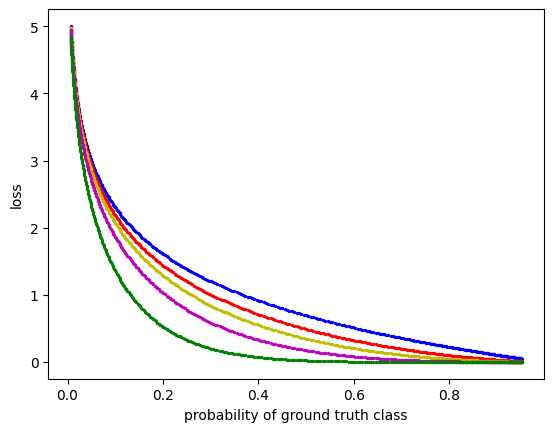

In [3]:
target = torch.tensor([0], dtype=torch.int64)

gammas = (0, 0.5, 1, 2, 5)  # gamma=0はCrossEntropyと等価
colors = ("b", "r", "y", "m", "g")

for gamma, color in zip(gammas, colors):
    loss = create_loss("focal", focal_gamma=gamma)
    for input in torch.arange(-2, 2, 0.01):
        input = torch.Tensor([[input, 1-input]])
        output = loss(input, target)
        plt.scatter(F.softmax(input, dim=1)[0,0], output, color=color, s=2)

plt.xlabel('probability of ground truth class')
plt.ylabel('loss')